In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

from protons.app.ligand_tautomers import *
from protons.app import logger
from protons.app.logger import log
from lxml import etree
import json
import sys
import rdkit
from protons import app
from simtk import unit, openmm as mm
from protons.app import ConstantPHCalibration, ForceFieldProtonDrive, NCMCProtonDrive
from protons.app import MetadataReporter, TitrationReporter, NCMCReporter, SAMSReporter
import shutil
import signal
import json
from protons.app.logger import log, logging
import numpy as np
from openmmtools.integrators import LangevinIntegrator, ExternalPerturbationLangevinIntegrator
log.setLevel(logging.DEBUG)
import os
import sys
import netCDF4
from saltswap.wrappers import Salinator
import json


[__init__.py:90 - pylab_setup() ] backend module://ipykernel.pylab.backend_inline version unknown


In [2]:
def setting_up_tautomer():
    # Retrieve parameter fields

    pH = 7.8
    max_penalty = 10
    tautomerize = True
    resname = 'UNL'

    ifolder = '/home/mwieder/Work/Projects/tautomers-protons//protons/UNL-testdata/input/'
    ofolder = '/home/mwieder/Work/Projects/tautomers-protons//protons/UNL-testdata/output/'

    #retrieve input fields
    icalib = ifolder + 'tautomer_set1_mol1.pdb'
    input_mol2 = ifolder + 'tautomer_set1_mol1.mol2'
    hydrogen_def = ofolder + 'tautomer_set.hxml'

    offxml = ofolder + 'tautomer_set.ffxml'
    ocalib = ofolder + 'tautomer_set.cif'


    # Debugging/intermediate files
    dhydrogen_fix = ofolder + 'tautomer_set1_hydrogen_fixed.mol2'
    dkeep_files = True

    

    if not os.path.isdir(ofolder):
        os.makedirs(ofolder)

    # Begin processing

    # process into mol2
    prepare_mol2_for_parametrization(input_mol2, dhydrogen_fix)
    # retrieve states


    # run epik
    t1 =  { 'log_population' : '1.0', 'net_charge' : 0 }
    t2 =  { 'log_population' : '.0', 'net_charge' : 0 }
    isomer_info = [ t1, t2 ]



    # parametrize
    s, compiler = generate_protons_ffxml(dhydrogen_fix, isomer_info, offxml, pH, resname=resname)
    # create hydrogens
    create_hydrogen_definitions(offxml, hydrogen_def)
    print('Finished with creating hydrogen definitions!')

    # set up calibration system
    #extract_residue('/home/mwieder/Work/Projects/protons/mw/example_scripts/ligand-parameter/t12.pdb',dext_res,resname='UNL')

    # prepare solvated system
    sim = prepare_calibration_system(icalib, ocalib, offxml, hydrogen_def)
    return compiler


[ligand_tautomers.py:266 - generate_protons_ffxml() ] Processing Epik output...
[ligand_tautomers.py:269 - generate_protons_ffxml() ] Parametrizing the isomers...
[ligand_tautomers.py:280 - generate_protons_ffxml() ] ffxml generation for 0
[openeye.py:91 - get_charges() ] keep_confs was set to 1. Molecule positions will be reset.
[openeye.py:327 - molecule_to_mol2() ] UNL
[ligand_tautomers.py:282 - generate_protons_ffxml() ] <ForceField>
 <Info>
  <DateGenerated>2019-03-07</DateGenerated>
 </Info>
 <Residues>
  <Residue name="UNL">
   <Atom name="O1" type="o" charge="-0.5453"/>
   <Atom name="C2" type="c" charge="0.5819"/>
   <Atom name="C3" type="ca" charge="-0.1679"/>
   <Atom name="C4" type="ca" charge="-0.07"/>
   <Atom name="C5" type="ca" charge="-0.145"/>
   <Atom name="C6" type="ca" charge="-0.1004"/>
   <Atom name="C7" type="ca" charge="-0.1364"/>
   <Atom name="C8" type="ca" charge="-0.0118"/>
   <Atom name="C9" type="ce" charge="-0.1238"/>
   <Atom name="C10" type="c2" charge

[{'log_population': '1.0', 'net_charge': 0, 'ffxml': <Element ForceField at 0x7f44d1e8e588>, 'pH': 7.8, 'mol-graph': <networkx.classes.graph.Graph object at 0x7f44d0239f60>}, {'log_population': '.0', 'net_charge': 0, 'ffxml': <Element ForceField at 0x7f44d020eec8>, 'pH': 7.8, 'mol-graph': <networkx.classes.graph.Graph object at 0x7f44d0239ef0>}]


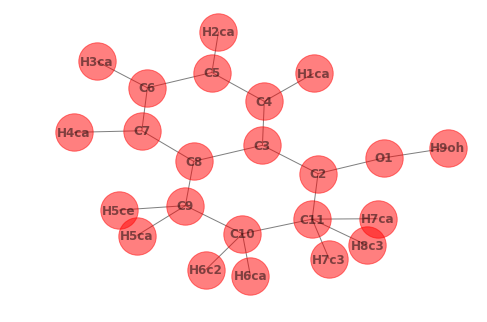

[ligand_tautomers.py:831 - _add_isomers() ] Add isomer information ...
[ligand_tautomers.py:905 - _add_isomers() ] ISOMER: 0
[ligand_tautomers.py:907 - _add_isomers() ] <State index="0" log_population="1.0" g_k="0.0" proton_count="0">
                <Condition pH="7.8" log_population="1.0" temperature_kelvin="298.15"/>
                </State>
[ligand_tautomers.py:935 - _add_isomers() ] <Atom name="O1" type="o" charge="-0.5453" epsilon="0.87864" sigma="0.2959921901149463" />
[ligand_tautomers.py:935 - _add_isomers() ] <Atom name="C2" type="c" charge="0.5819" epsilon="0.359824" sigma="0.3399669508423535" />
[ligand_tautomers.py:935 - _add_isomers() ] <Atom name="C3" type="ca" charge="-0.1679" epsilon="0.359824" sigma="0.3399669508423535" />
[ligand_tautomers.py:935 - _add_isomers() ] <Atom name="C4" type="ca" charge="-0.07" epsilon="0.359824" sigma="0.3399669508423535" />
[ligand_tautomers.py:935 - _add_isomers() ] <Atom name="C5" type="ca" charge="-0.145" epsilon="0.359824" sigma="0.3

####################
0
{'O1': 'o', 'C2': 'c', 'C3': 'ca', 'C4': 'ca', 'C5': 'ca', 'C6': 'ca', 'C7': 'ca', 'C8': 'ca', 'C9': 'ce', 'C10': 'c2', 'C11': 'c3', 'H1ca': 'ha', 'H2ca': 'ha', 'H3ca': 'ha', 'H4ca': 'ha', 'H5ce': 'ha', 'H6c2': 'ha', 'H7c3': 'hc', 'H8c3': 'hc'}


[ligand_tautomers.py:935 - _add_isomers() ] <Atom name="H1ca" type="ha" charge="0.157" epsilon="0.06276" sigma="0.25996424595335105" />
[ligand_tautomers.py:935 - _add_isomers() ] <Atom name="H2ca" type="ha" charge="0.1379" epsilon="0.06276" sigma="0.25996424595335105" />
[ligand_tautomers.py:935 - _add_isomers() ] <Atom name="H3ca" type="ha" charge="0.1344" epsilon="0.06276" sigma="0.25996424595335105" />
[ligand_tautomers.py:935 - _add_isomers() ] <Atom name="H4ca" type="ha" charge="0.1362" epsilon="0.06276" sigma="0.25996424595335105" />
[ligand_tautomers.py:935 - _add_isomers() ] <Atom name="H5ce" type="ha" charge="0.1354" epsilon="0.06276" sigma="0.25996424595335105" />
[ligand_tautomers.py:935 - _add_isomers() ] <Atom name="H6c2" type="ha" charge="0.1316" epsilon="0.06276" sigma="0.25996424595335105" />
[ligand_tautomers.py:935 - _add_isomers() ] <Atom name="H7c3" type="hc" charge="0.0902" epsilon="0.06568879999999999" sigma="0.2649532787749369" />
[ligand_tautomers.py:935 - _add

O1 C2
regular in isomer
O1 H9oh
not regular. in other isomer.
<Bond type1="o" type2="dH9oh" length="0.0973" k="310787.5199999999"/>
C2 C3
regular in isomer
C2 C11
regular in isomer
C3 C8
regular in isomer
C3 C4
regular in isomer
C4 H1ca
regular in isomer
C4 C5
regular in isomer
C5 H2ca
regular in isomer
C5 C6
regular in isomer
C6 H3ca
regular in isomer
C6 C7
regular in isomer
C7 H4ca
regular in isomer
C7 C8
regular in isomer
C8 C9
regular in isomer
C9 C10
regular in isomer
C9 H5ce
regular in isomer
C9 H5ca
not regular. in other isomer.
<Bond type1="ce" type2="dH5ca" length="0.10860000000000002" k="289365.43999999994"/>
C10 C11
regular in isomer
C10 H6c2
regular in isomer
C10 H6ca
not regular. in other isomer.
<Bond type1="c2" type2="dH6ca" length="0.10860000000000002" k="289365.43999999994"/>
C11 H7c3
regular in isomer
C11 H8c3
regular in isomer
C11 H7ca
not regular. in other isomer.
<Bond type1="c3" type2="dH7ca" length="0.10860000000000002" k="289365.43999999994"/>
0
O1 C2 C3
Found p

b'<Proper name1="C2" name2="C11" name3="C10" name4="H6c2" periodicity1="2" phase1="0.0" k1="0.0" periodicity2="0.0" phase2="0.0" k2="0.0" periodicity3="0" phase3="0.0" k3="0.0" periodicity4="0.0" phase4="0.0" k4="0.0" periodicity5="0.0" phase5="0.0" k5="0.0"/>'
###################
C2 C11 C10 H6ca
Found parameters in isomer: 1.
b'<Proper name1="C2" name2="C11" name3="C10" name4="H6ca" periodicity1="2" phase1="3.141592653589793" k1="15.167" periodicity2="0.0" phase2="0.0" k2="0.0" periodicity3="0" phase3="0.0" k3="0.0" periodicity4="0.0" phase4="0.0" k4="0.0" periodicity5="0.0" phase5="0.0" k5="0.0"/>'
###################
C3 C2 O1 H9oh
Found parameters in isomer: 1.
b'<Proper name1="C3" name2="C2" name3="O1" name4="H9oh" periodicity1="2" phase1="3.141592653589793" k1="3.7656" periodicity2="0.0" phase2="0.0" k2="0.0" periodicity3="0" phase3="0.0" k3="0.0" periodicity4="0.0" phase4="0.0" k4="0.0" periodicity5="0.0" phase5="0.0" k5="0.0"/>'
###################
C3 C2 C11 C10
Found parameters

b'<Proper name1="C8" name2="C3" name3="C4" name4="C5" periodicity1="2" phase1="3.141592653589793" k1="15.167" periodicity2="0.0" phase2="0.0" k2="0.0" periodicity3="0" phase3="0.0" k3="0.0" periodicity4="0.0" phase4="0.0" k4="0.0" periodicity5="0.0" phase5="0.0" k5="0.0"/>'
###################
C8 C3 C4 H1ca
Found parameters in regular approach.
b'<Proper name1="C8" name2="C3" name3="C4" name4="H1ca" periodicity1="2" phase1="3.141592653589793" k1="15.167" periodicity2="0.0" phase2="0.0" k2="0.0" periodicity3="0" phase3="0.0" k3="0.0" periodicity4="0.0" phase4="0.0" k4="0.0" periodicity5="0.0" phase5="0.0" k5="0.0"/>'
###################
C8 C7 C6 C5
Found parameters in regular approach.
b'<Proper name1="C8" name2="C7" name3="C6" name4="C5" periodicity1="2" phase1="3.141592653589793" k1="15.167" periodicity2="0.0" phase2="0.0" k2="0.0" periodicity3="0" phase3="0.0" k3="0.0" periodicity4="0.0" phase4="0.0" k4="0.0" periodicity5="0.0" phase5="0.0" k5="0.0"/>'
###################
C8 C7 C6 H3

[ligand_tautomers.py:905 - _add_isomers() ] ISOMER: 1
[ligand_tautomers.py:907 - _add_isomers() ] <State index="1" log_population=".0" g_k="0.0" proton_count="0">
                <Condition pH="7.8" log_population=".0" temperature_kelvin="298.15"/>
                </State>
[ligand_tautomers.py:935 - _add_isomers() ] <Atom name="O1" type="oh" charge="-0.5008" epsilon="0.8803136" sigma="0.3066473387839048" />
[ligand_tautomers.py:935 - _add_isomers() ] <Atom name="C2" type="ca" charge="0.1463" epsilon="0.359824" sigma="0.3399669508423535" />
[ligand_tautomers.py:935 - _add_isomers() ] <Atom name="C3" type="ca" charge="-0.0496" epsilon="0.359824" sigma="0.3399669508423535" />
[ligand_tautomers.py:935 - _add_isomers() ] <Atom name="C4" type="ca" charge="-0.0922" epsilon="0.359824" sigma="0.3399669508423535" />
[ligand_tautomers.py:935 - _add_isomers() ] <Atom name="C5" type="ca" charge="-0.141" epsilon="0.359824" sigma="0.3399669508423535" />
[ligand_tautomers.py:935 - _add_isomers() ] <At

b'<Proper name1="H7ca" name2="C11" name3="C10" name4="C9" periodicity1="2" phase1="3.141592653589793" k1="15.167" periodicity2="0.0" phase2="0.0" k2="0.0" periodicity3="0" phase3="0.0" k3="0.0" periodicity4="0.0" phase4="0.0" k4="0.0" periodicity5="0.0" phase5="0.0" k5="0.0"/>'
###################
H7ca C11 C10 H6c2
Found parameter between four atoms that are never real at any one isomer
###################
H7ca C11 C10 H6ca
Found parameters in isomer: 1.
b'<Proper name1="H7ca" name2="C11" name3="C10" name4="H6ca" periodicity1="2" phase1="3.141592653589793" k1="15.167" periodicity2="0.0" phase2="0.0" k2="0.0" periodicity3="0" phase3="0.0" k3="0.0" periodicity4="0.0" phase4="0.0" k4="0.0" periodicity5="0.0" phase5="0.0" k5="0.0"/>'
####################
1
{'O1': 'oh', 'C2': 'ca', 'C3': 'ca', 'C4': 'ca', 'C5': 'ca', 'C6': 'ca', 'C7': 'ca', 'C8': 'ca', 'C9': 'ca', 'C10': 'ca', 'C11': 'ca', 'H1ca': 'ha', 'H2ca': 'ha', 'H3ca': 'ha', 'H4ca': 'ha', 'H5ca': 'ha', 'H6ca': 'ha', 'H9oh': 'ho', 'H7c

[ligand_tautomers.py:985 - _add_isomers() ] <Bond name1="C10" name2="H6c2" length="0.10879000000000001" k="287106.07999999996"/>
[ligand_tautomers.py:985 - _add_isomers() ] <Bond name1="C10" name2="H6ca" length="0.10860000000000002" k="289365.43999999994"/>
[ligand_tautomers.py:985 - _add_isomers() ] <Bond name1="C11" name2="H7c3" length="0.10969000000000001" k="276646.07999999996"/>
[ligand_tautomers.py:985 - _add_isomers() ] <Bond name1="C11" name2="H8c3" length="0.10969000000000001" k="276646.07999999996"/>
[ligand_tautomers.py:985 - _add_isomers() ] <Bond name1="C11" name2="H7ca" length="0.10860000000000002" k="289365.43999999994"/>


C10 H6c2
not regular. in other isomer.
C10 H6ca
regular in isomer
C11 H7c3
not regular. in other isomer.
C11 H8c3
not regular. in other isomer.
C11 H7ca
regular in isomer
1
O1 C2 C3
Found parameters in regular approach.
O1 C2 C11
Found parameters in regular approach.
C2 O1 H9oh
Found parameters in regular approach.
C2 C3 C4
Found parameters in regular approach.
C2 C3 C8
Found parameters in regular approach.
C2 C11 C10
Found parameters in regular approach.
C2 C11 H7c3
Found parameters in isomer: 0.
C2 C11 H8c3
Found parameters in isomer: 0.
C2 C11 H7ca
Found parameters in regular approach.
C3 C2 O1
Found parameters in regular approach.
C3 C2 C11
Found parameters in regular approach.
C3 C4 C5
Found parameters in regular approach.
C3 C4 H1ca
Found parameters in regular approach.
C3 C8 C7
Found parameters in regular approach.
C3 C8 C9
Found parameters in regular approach.
C4 C3 C2
Found parameters in regular approach.
C4 C3 C8
Found parameters in regular approach.
C4 C5 C6
Found parameters

b'<Proper name1="C5" name2="C6" name3="C7" name4="H4ca" periodicity1="2" phase1="3.141592653589793" k1="15.167" periodicity2="0.0" phase2="0.0" k2="0.0" periodicity3="0" phase3="0.0" k3="0.0" periodicity4="0.0" phase4="0.0" k4="0.0" periodicity5="0.0" phase5="0.0" k5="0.0"/>'
###################
C6 C5 C4 C3
Found parameters in regular approach.
b'<Proper name1="C6" name2="C5" name3="C4" name4="C3" periodicity1="2" phase1="3.141592653589793" k1="15.167" periodicity2="0.0" phase2="0.0" k2="0.0" periodicity3="0" phase3="0.0" k3="0.0" periodicity4="0.0" phase4="0.0" k4="0.0" periodicity5="0.0" phase5="0.0" k5="0.0"/>'
###################
C6 C5 C4 H1ca
Found parameters in regular approach.
b'<Proper name1="C6" name2="C5" name3="C4" name4="H1ca" periodicity1="2" phase1="3.141592653589793" k1="15.167" periodicity2="0.0" phase2="0.0" k2="0.0" periodicity3="0" phase3="0.0" k3="0.0" periodicity4="0.0" phase4="0.0" k4="0.0" periodicity5="0.0" phase5="0.0" k5="0.0"/>'
###################
C6 C7 C8 

b'<Proper name1="C9" name2="C10" name3="C11" name4="C2" periodicity1="2" phase1="3.141592653589793" k1="15.167" periodicity2="0.0" phase2="0.0" k2="0.0" periodicity3="0" phase3="0.0" k3="0.0" periodicity4="0.0" phase4="0.0" k4="0.0" periodicity5="0.0" phase5="0.0" k5="0.0"/>'
###################
C9 C10 C11 H7c3
Found parameters in isomer: 0.
b'<Proper name1="C9" name2="C10" name3="C11" name4="H7c3" periodicity1="2" phase1="0.0" k1="0.0" periodicity2="0.0" phase2="0.0" k2="0.0" periodicity3="0" phase3="0.0" k3="0.0" periodicity4="0.0" phase4="0.0" k4="0.0" periodicity5="0.0" phase5="0.0" k5="0.0"/>'
###################
C9 C10 C11 H8c3
Found parameters in isomer: 0.
b'<Proper name1="C9" name2="C10" name3="C11" name4="H8c3" periodicity1="2" phase1="0.0" k1="0.0" periodicity2="0.0" phase2="0.0" k2="0.0" periodicity3="0" phase3="0.0" k3="0.0" periodicity4="0.0" phase4="0.0" k4="0.0" periodicity5="0.0" phase5="0.0" k5="0.0"/>'
###################
C9 C10 C11 H7ca
Found parameters in regular a

[ligand_tautomers.py:590 - _append_dummy_parameters() ] ################################
[ligand_tautomers.py:591 - _append_dummy_parameters() ] Appending dummy parameters
[ligand_tautomers.py:592 - _append_dummy_parameters() ] ################################
[ligand_tautomers.py:597 - _append_dummy_parameters() ] Adding dummy atom element: 
<Type name="dH7ca" class="dH7ca" element="H" mass="1.008"/>
[ligand_tautomers.py:597 - _append_dummy_parameters() ] Adding dummy atom element: 
<Type name="dH6ca" class="dH6ca" element="H" mass="1.008"/>
[ligand_tautomers.py:597 - _append_dummy_parameters() ] Adding dummy atom element: 
<Type name="dH9oh" class="dH9oh" element="H" mass="1.008"/>
[ligand_tautomers.py:597 - _append_dummy_parameters() ] Adding dummy atom element: 
<Type name="dH5ca" class="dH5ca" element="H" mass="1.008"/>
[ligand_tautomers.py:602 - _append_dummy_parameters() ] Adding dummy atom nonbonded parameters: 
<Atom type="dH5ca" sigma="0" epsilon="0" charge="0.0"/>
[ligand_ta

b'<Proper name1="H7ca" name2="C11" name3="C10" name4="C9" periodicity1="2" phase1="3.141592653589793" k1="15.167" periodicity2="0.0" phase2="0.0" k2="0.0" periodicity3="0" phase3="0.0" k3="0.0" periodicity4="0.0" phase4="0.0" k4="0.0" periodicity5="0.0" phase5="0.0" k5="0.0"/>'
###################
H7ca C11 C10 H6c2
Found parameter between four atoms that are never real at any one isomer
###################
H7ca C11 C10 H6ca
Found parameters in regular approach.
b'<Proper name1="H7ca" name2="C11" name3="C10" name4="H6ca" periodicity1="2" phase1="3.141592653589793" k1="15.167" periodicity2="0.0" phase2="0.0" k2="0.0" periodicity3="0" phase3="0.0" k3="0.0" periodicity4="0.0" phase4="0.0" k4="0.0" periodicity5="0.0" phase5="0.0" k5="0.0"/>'
<Bond type1="c3" type2="dH7ca" length="0.10860000000000002" k="289365.43999999994"/>
<Bond type1="c2" type2="dH6ca" length="0.10860000000000002" k="289365.43999999994"/>
<Bond type1="ce" type2="dH5ca" length="0.10860000000000002" k="289365.43999999994"/

In [3]:
compiler = setting_up_tautomer()

In [4]:
% cat /home/mwieder/Work/Projects/tautomers-protons//protons/UNL-testdata/output/tautomer_set.ffxml

<ForceField>
  <Residues>
    <Residue name="UNL">
      <Atom name="O1" type="o" charge="-0.5453"/>
      <Atom name="C2" type="c" charge="0.5819"/>
      <Atom name="C3" type="ca" charge="-0.1679"/>
      <Atom name="C4" type="ca" charge="-0.07"/>
      <Atom name="C5" type="ca" charge="-0.145"/>
      <Atom name="C6" type="ca" charge="-0.1004"/>
      <Atom name="C7" type="ca" charge="-0.1364"/>
      <Atom name="C8" type="ca" charge="-0.0118"/>
      <Atom name="C9" type="ce" charge="-0.1238"/>
      <Atom name="C10" type="c2" charge="-0.1422"/>
      <Atom name="C11" type="c3" charge="-0.1522"/>
      <Atom name="H1ca" type="ha" charge="0.157"/>
      <Atom name="H2ca" type="ha" charge="0.1379"/>
      <Atom name="H3ca" type="ha" charge="0.1344"/>
      <Atom name="H4ca" type="ha" charge="0.1362"/>
      <Atom name="H5ce" type="ha" charge="0.1354"/>
      <Atom name="H6c2" type="ha" charge="0.1316"/>
      <Atom name="H7c3" type="hc" charge="0.0902"/>
      <Atom name="H8c3" type=

In [5]:
# Define what to do on timeout
class TimeOutError(RuntimeError):
    """This error is raised when an operation is taking longer than expected."""
    pass


def timeout_handler(signum, frame):
    """Handle a timeout."""
    log.warn("Script is running out of time. Attempting to exit cleanly.")
    raise TimeOutError("Running out of time, shutting down!")

def serialize_state(context, outputfile):
    """
    Serialize the simulation state to xml.
    """
    xmls = mm.XmlSerializer
    statexml = xmls.serialize(context.getState(getPositions=True, getVelocities=True))
    with open(outputfile,'w') as statefile:
        statefile.write(statexml)

def serialize_drive(drive, outputfile):
    """
    Serialize the drive residues to xml.
    """
    drivexml = drive.serialize_titration_groups()
    with open(outputfile, 'wb') as drivefile:
        drivefile.write(drivexml)

def serialize_sams_status(calibration, outputfile):
    """
    Serialize the state of the SAMS calibration as json
    """
    samsProperties = calibration.export_samsProperties()
    samsjson = json.dumps(samsProperties, sort_keys=True, indent=4, separators=(',', ': '))
    with open(outputfile, 'w') as samsfile:
        samsfile.write(samsjson)

class ExternalGBAOABIntegrator(ExternalPerturbationLangevinIntegrator):
    """
    Implementation of the gBAOAB integrator which tracks external protocol work.

    Parameters
    ----------
        number_R: int, default: 1
            The number of sequential R steps.  For instance V R R O R R V has number_R = 2
        temperature : simtk.unit.Quantity compatible with kelvin, default: 298*unit.kelvin
           The temperature.
        collision_rate : simtk.unit.Quantity compatible with 1/picoseconds, default: 1.0/unit.picoseconds
           The collision rate.
        timestep : simtk.unit.Quantity compatible with femtoseconds, default: 1.0*unit.femtoseconds
           The integration timestep.


    """

    def __init__(self, number_R_steps=1, temperature=298.0 * unit.kelvin,
                 collision_rate=1.0 / unit.picoseconds,
                 timestep=1.0 * unit.femtoseconds,
                 constraint_tolerance=1e-7
                 ):
        Rstep = " R" * number_R_steps

        super(ExternalGBAOABIntegrator, self).__init__(splitting="V{0} O{0} V".format(Rstep),
                                                       temperature=temperature,
                                                       collision_rate=collision_rate,
                                                       timestep=timestep,
                                                       constraint_tolerance=constraint_tolerance,
                                                       measure_shadow_work=False,
                                                       measure_heat=False,
                                                       )


def calibrate_system(compiler):
    """Main simulation loop."""
    ofolder = '/home/mwieder/Work/Projects/tautomers-protons/protons/UNL-testdata/output/'

    input_pdbx_file = ofolder + '/tautomer_set.cif'
    custom_xml = ofolder + '/tautomer_set.ffxml'

    forcefield = app.ForceField('amber10-constph.xml', 'gaff.xml', custom_xml, 'tip3p.xml', 'ions_tip3p.xml')

    # Load the PDBxfile and the forcefield files
    pdb_object = app.PDBxFile(input_pdbx_file)

    # Prepare the Simulation
    topology = pdb_object.topology
    
    
    positions = pdb_object.positions

    # Quick fix for histidines in topology
    # Openmm relabels them HIS, which leads to them not being detected as
    # titratable. Renaming them fixes this.
    for residue in topology.residues():
        if residue.name == 'HIS':
            residue.name = 'HIP'

    name_netcdf = "test.netcdf"
    dcd_output_name = "test.dcd"


    output_context_xml = "state.xml"
    output_drive_xml = "drive.xml"
    output_calibration_json = "calibration.json"

    # Integrator options
    timestep = 2.0 * unit.femtosecond
    constraint_tolerance = 1e-07
    collision_rate = 1.0 / unit.picosecond
    number_R_steps = 1

    # Steps of MD before starting the main loop
    num_thermalization_steps = 10000
    # Steps of MD in between MC moves
    steps_between_updates = 10000

    counterion_method = 'chenroux'
    ncmc_steps_per_trial = 10000 * 2
    prop_steps_per_trial = 1
    total_iterations = 10000

    modulo_ligand_update = 1 # Update ligand every n iterations

    # settings form minimization
    pre_run_minimization_tolerance = float(1e-05) * unit.kilojoule / unit.mole
    minimization_max_iterations = 0

    # SAMS settings
    sams = {}
    beta_sams = 0.5
    flatness_criterion = 0.15
    sams[beta_sams] = beta_sams 
    sams[flatness_criterion] = flatness_criterion

    # Script specific settings
    script_timeout = 428400 # 119 hours

    # Platform Options

    #platform = mm.Platform.getPlatformByName('CUDA')
    platform = mm.Platform.getPlatformByName('CPU')
    properties = {'CudaPrecision': 'mixed', 'DeterministicForces': 'true'}
    # System Configuration
    nonbondedMethod = app.PME
    constraints = app.HBonds
    rigidWater = True
    ewaldErrorTolerance = 1e-05
    barostatInterval =  25
    switching_distance = 0.85 * unit.nanometers
    nonbondedCutoff = 1.0 * unit.nanometers
    pressure = 1.0 * unit.atmosphere
    temperature = 300.0 * unit.kelvin

    system = forcefield.createSystem(topology, nonbondedMethod=nonbondedMethod, constraints=constraints,
                                     rigidWater=rigidWater, ewaldErrorTolerance=ewaldErrorTolerance, nonbondedCutoff=nonbondedCutoff)

    #
    for force in system.getForces():
        if isinstance(force, mm.NonbondedForce):
            force.setUseSwitchingFunction(True)
            force.setSwitchingDistance(switching_distance)

    # NPT simulation
    system.addForce(
        mm.MonteCarloBarostat(
            pressure,
            temperature,
            barostatInterval))


    integrator = ExternalGBAOABIntegrator(number_R_steps=number_R_steps, temperature=temperature, collision_rate=collision_rate, timestep=timestep, constraint_tolerance=constraint_tolerance)
    ncmc_propagation_integrator = ExternalGBAOABIntegrator(number_R_steps=number_R_steps, temperature=temperature, collision_rate=collision_rate, timestep=timestep, constraint_tolerance=constraint_tolerance)

    # Define a compound integrator
    compound_integrator = mm.CompoundIntegrator()
    compound_integrator.addIntegrator(integrator)
    compound_integrator.addIntegrator(ncmc_propagation_integrator)
    compound_integrator.setCurrentIntegrator(0)

    driver = ForceFieldProtonDrive(temperature, topology, system, forcefield, ['amber10-constph.xml', custom_xml], compiler,pressure=pressure,
                                           perturbations_per_trial=ncmc_steps_per_trial, propagations_per_step=prop_steps_per_trial, residues_by_name=['UNL'])
    
    # Assumes ligand is always the last titration group
    ligand_titration_group_index = len(driver.titrationGroups) - 1
    # Define residue pools
    pools = {'ligand' : [ligand_titration_group_index]}
    driver.define_pools(pools)
    # Create SAMS sampler
    log.info('Setting up Constant pH Calibartion ...')
    simulation = app.ConstantPHCalibration(topology, system, compound_integrator, driver, group_index=ligand_titration_group_index, platform=platform, samsProperties=sams)
    simulation.context.setPositions(positions)
    salinator = Salinator(context=simulation.context,
                            system=system,
                            topology=topology,
                            ncmc_integrator=compound_integrator.getIntegrator(1),
                            salt_concentration=0.150 * unit.molar,
                            pressure=pressure,
                            temperature=temperature)
    salinator.neutralize()
    
    salinator.initialize_concentration()
    swapper = salinator.swapper
    # if chen-roux required, attach swapper. Else, use neutralizing background charge
    if counterion_method in ["chenroux", "chen-roux"]:
        simulation.drive.attach_swapper(swapper)

    simulation.minimizeEnergy(tolerance=pre_run_minimization_tolerance, maxIterations=minimization_max_iterations)
    simulation.step(num_thermalization_steps)
    log.info('Starting with simulation')

    dcdreporter = app.DCDReporter(dcd_output_name, int(steps_between_updates/10))
    ncfile = netCDF4.Dataset(name_netcdf, "w")
    metdatarep = MetadataReporter(ncfile)
    ncmcrep = NCMCReporter(ncfile,1)
    titrep = TitrationReporter(ncfile,1)
    simulation.reporters.append(dcdreporter)
    simulation.update_reporters.append(metdatarep)
    simulation.update_reporters.append(ncmcrep)
    simulation.update_reporters.append(titrep)
    samsrep = SAMSReporter(ncfile,1)
    simulation.calibration_reporters.append(samsrep)
    pdb = mm.app.PDBFile('/home/mwieder/input.pdb')
    
    # Raises an exception if the simulation runs out of time, so that the script can be killed cleanly from within python
    signal.alarm(script_timeout)
    
    try:
        for i in range(total_iterations):
            log.info("Iteration %i", i)
            if i == 5:
                log.info("Simulation seems to be working. Suppressing debugging info.")
                log.setLevel(logging.INFO)
            
            pos = simulation.context.getState(getPositions=True).getPositions() 
            mm.app.PDBFile.writeFile(pdb.topology, pos, open('/home/mwieder/tmp_wd/00_0_mcmc_'+str(i)+'.pdb', 'w'))
            simulation.step(steps_between_updates)
            success = simulation.update(1, pool='ligand')
            pos = simulation.context.getState(getPositions=True).getPositions() 
            mm.app.PDBFile.writeFile(pdb.topology, pos, open('/home/mwieder/tmp_wd/00_1_mcmc_'+str(i)+'_success_' + str(success) +'.pdb', 'w'))
            simulation.adapt()
        
        # Reset timer
        signal.alarm(0)

    except TimeOutError:
        log.warn("Simulation ran out of time, saving current results.")

    finally:
        # export the context
        serialize_state(simulation.context,output_context_xml)
        # export the driver
        serialize_drive(simulation.drive, output_drive_xml)
        # export the calibration status
        serialize_sams_status(simulation, output_calibration_json)

        ncfile.close()

    return topology

    # End of script

In [6]:
t = calibrate_system(compiler)

[driver.py:2770 - __init__() ] Selected residue indeces: [0]
[driver.py:2904 - _add_xml_titration_groups() ] - Parameters for the different states as defined in ffxml
[driver.py:2793 - _generating_parameter_lookup_dicts() ] ###############
[driver.py:2795 - _generating_parameter_lookup_dicts() ] -- Looking at parameters of State: 0
[driver.py:2815 - _generating_parameter_lookup_dicts() ] Parsing proper parameters from ffxml file
[driver.py:1535 - _add_titration_state() ] Adding titration state ...
[driver.py:1880 - _cache_force() ] #########################
[driver.py:1881 - _cache_force() ] Titration group index 0
[driver.py:1882 - _cache_force() ] titration state index 0
[driver.py:1883 - _cache_force() ] #########################


AttributeError: '_TitrationState' object has no attribute 'atom_name'

In [ ]:
% cat /home/mwieder/Work/Projects/tautomers/protons/UNL-testdata/output/tautomer_set1.hxml

In [ ]:
% cat dummy.xml

In [ ]:
% less ../../../tautomers-protons/protons/UNL-testdata/output/tautomer_set.ffxml

In [ ]:
% cat ../ /protons/UNL-testdata/output/tautomer_set1.ffxml 

In [ ]:
% cat  ~/test.xml

In [ ]:
% cat tautomer_pair_mol1.hxml

In [ ]:
% cat tautomer_pair_mol1_fixed_hydrogens.mol2